In [1]:
import sys
sys.path.append("../")

from rbm import fasta_read, get_beta_and_W, all_weights, RBM
import analysis_methods as am

from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import subprocess as sp
import matplotlib.image as mpimg


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


In [2]:
data_files = ['np1_c1.fasta', 'np2_c1.fasta', 'np3_c1.fasta', 'n1_c1.fasta', 'b3_c1.fasta']
rounds = ['np1_c1', 'np2_c1', 'np3_c1', 'n1_c1', 'b3_c1']
rbm_names = ['np1_c1', 'np2_c1', 'np3_c1', 'n1_c1', 'b3_c1']
local_rbm_dir = '/mnt/D1/globus/pig_trained_rbms/gm2/'
data_dir = '../../pig_tissue/gaps_middle_2_clusters/'
server_rbm_dir = '../../pig_tissue/gaps_middle_2_clusters/trained_rbms/'
molecule = 'protein'
cluster = 1

In [3]:
# generate weights in each rbmdirectory
for rid, rbm in enumerate(rbm_names):
    checkp, version_dir = am.get_checkpoint_path(rbm, rbmdir=local_rbm_dir)
    tmp = RBM.load_from_checkpoint(checkp)
    all_weights(tmp, version_dir +rbm+"_weights", 5, 1, 6, 2, "protein")


../rbm_utils.py:313: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(xticks, xtickslabels)


In [4]:
# Stores all data in a dictionary ("data")
all_data = am.fetch_data(rounds, dir=data_dir, counts=True, molecule=molecule)


Process Time 1.1911954879760742
Process Time 0.6276493072509766
Process Time 1.1086151599884033
Process Time 1.6426923274993896
Process Time 0.6155498027801514


In [5]:
paths_u, paths_w = [], []
for r in rounds:
    paths_u.append(am.seq_logo(all_data[all_data["round"] == r], f"{r}_seqlogo", weight=False, outdir="./generated/"))
    paths_w.append(am.seq_logo(all_data[all_data["round"] == r], f"{r}_w_seqlogo", weight=True, outdir="./generated/"))


<ipython-input-6-5c8c0ce4f927>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(5, 2)


<Figure size 600x1000 with 0 Axes>

<Figure size 600x1000 with 0 Axes>

<Figure size 600x1000 with 0 Axes>

<Figure size 600x1000 with 0 Axes>

<Figure size 600x1000 with 0 Axes>

<Figure size 600x1000 with 0 Axes>

<Figure size 600x1000 with 0 Axes>

<Figure size 600x1000 with 0 Axes>

<Figure size 600x1000 with 0 Axes>

<Figure size 600x1000 with 0 Axes>

<Figure size 600x1000 with 0 Axes>

<Figure size 600x1000 with 0 Axes>

<Figure size 600x1000 with 0 Axes>

<Figure size 600x1000 with 0 Axes>

<Figure size 600x1000 with 0 Axes>

<Figure size 600x1000 with 0 Axes>

<Figure size 600x1000 with 0 Axes>

<Figure size 600x1000 with 0 Axes>

<Figure size 600x1000 with 0 Axes>

<Figure size 600x1000 with 0 Axes>

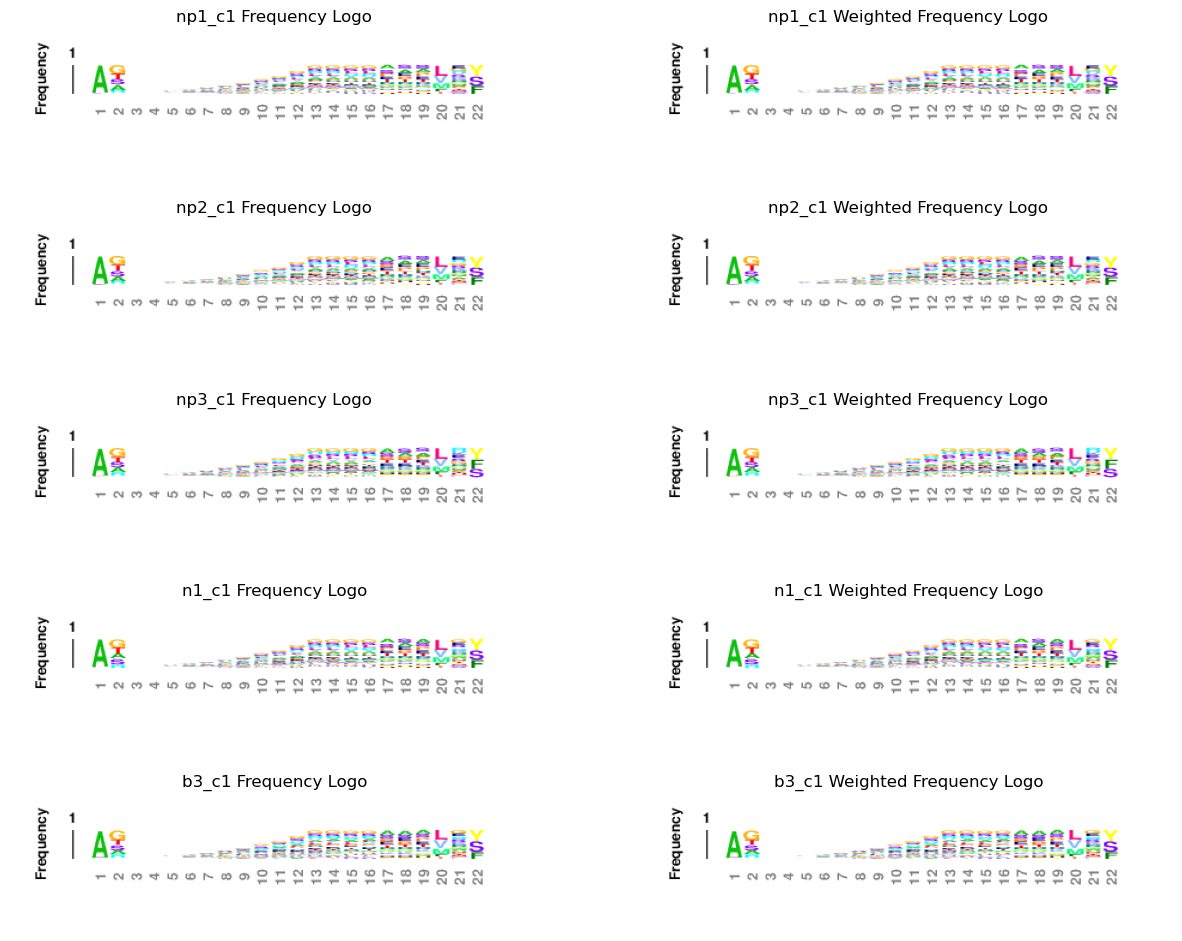

In [6]:
# Seq Logo showing Frequency of Each Amino Acid at each position
fig, axs = plt.subplots(5, 2)
fig.set_size_inches(15, 12)
for rid, r in enumerate(rounds):
    img1 = mpimg.imread(f"{paths_u[rid]}.freq.png")
    img2 = mpimg.imread(f"{paths_w[rid]}.freq.png")
    axs[rid][0].imshow(img1)
    axs[rid][1].imshow(img2)
    axs[rid][0].axis("off")
    axs[rid][1].axis("off")
    axs[rid][0].set_title(f"{r} Frequency Logo")
    axs[rid][1].set_title(f"{r} Weighted Frequency Logo")
plt.show()


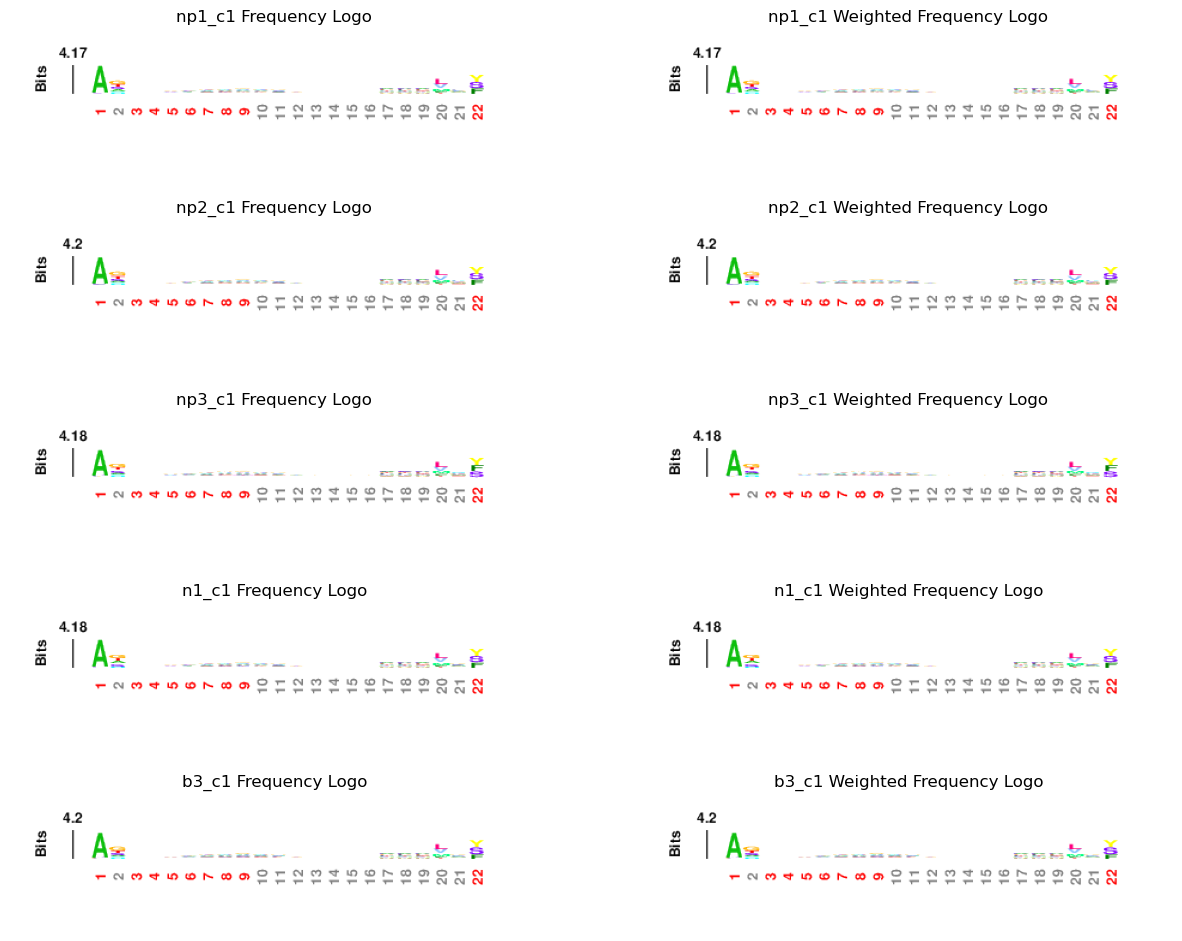

In [7]:
# Seq Logo showing Information of Each Amino Acid at each position
fig, axs = plt.subplots(5, 2)
fig.set_size_inches(15, 12)
for rid, r in enumerate(rounds):
    img1 = mpimg.imread(f"{paths_u[rid]}.info.png")
    img2 = mpimg.imread(f"{paths_u[rid]}.info.png")
    axs[rid][0].imshow(img1)
    axs[rid][1].imshow(img2)
    axs[rid][0].axis("off")
    axs[rid][1].axis("off")
    axs[rid][0].set_title(f"{r} Frequency Logo")
    axs[rid][1].set_title(f"{r} Weighted Frequency Logo")
plt.show()


In [8]:
# calculate likelihoods from last round rbm only
checkp, v_dir = am.get_checkpoint_path(rbm_names[-1], rbmdir=local_rbm_dir)
last_round_rbm = RBM.load_from_checkpoint(checkp)

# this takes awhile, might be something I optimize further in the future
am.generate_likelihoods(rounds, last_round_rbm, all_data, str(rbm_names[-1]) + "_all_likelihoods")


In [9]:
last_round_likelihoods = am.get_likelihoods("./generated/" + str(rbm_names[-1]) + "_all_likelihoods.json")


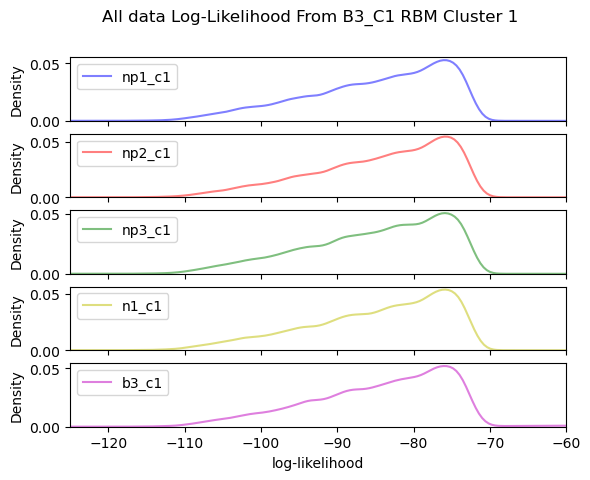

In [11]:

# Plot Likelihoods of Each batch of Data
last_round_title = f"All data Log-Likelihood From {rbm_names[-1].upper()} RBM Cluster {cluster}"

am.plot_likelihoods(last_round_likelihoods["likelihoods"], rounds, rounds, title=last_round_title, xlim=(-125, -60), cdf=False)


In [12]:
# calculate likelihoods from first round rbm only
checkp, v_dir = am.get_checkpoint_path(rbm_names[0], rbmdir=local_rbm_dir)
first_round_rbm = RBM.load_from_checkpoint(checkp)

# this takes awhile, might be something I optimize further in the future
am.generate_likelihoods(rounds, first_round_rbm, all_data, str(rbm_names[0]) + "_all_likelihoods")


In [13]:
first_round_likelihoods = am.get_likelihoods("./generated/" + str(rbm_names[0]) + "_all_likelihoods.json")


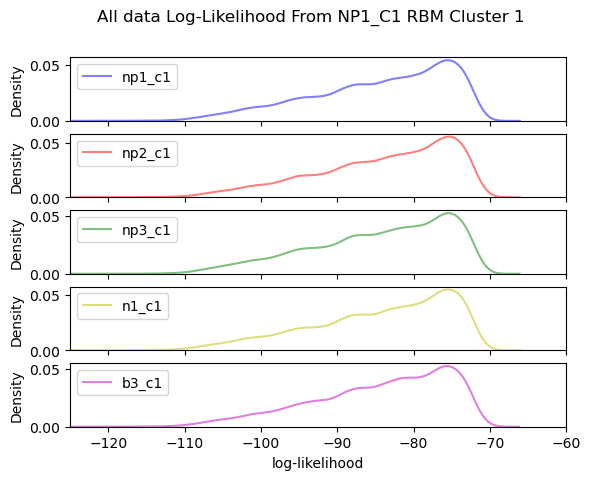

In [15]:

# Plot Likelihoods of Each batch of Data
first_round_title = f"All data Log-Likelihood From {rbm_names[0].upper()} RBM Cluster {cluster}"

am.plot_likelihoods(first_round_likelihoods["likelihoods"], rounds, rounds, title=first_round_title, xlim=(-125, -60), cdf=False)


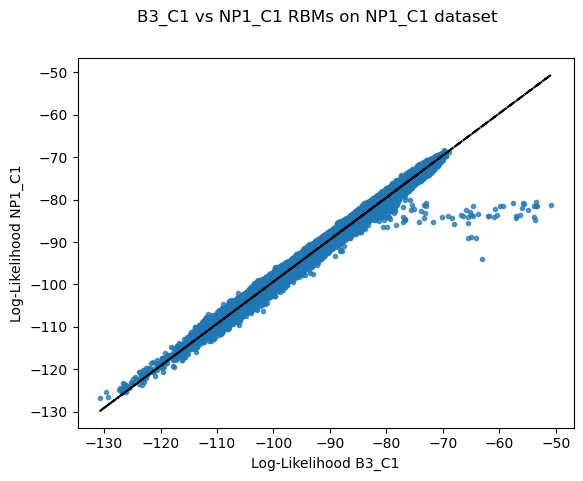

In [16]:
lr_label = rounds[-1].upper()
fr_label = rounds[0].upper()
am.compare_likelihood_correlation(last_round_likelihoods["likelihoods"][rounds[0]], first_round_likelihoods["likelihoods"][rounds[0]], f"{lr_label} vs {fr_label} RBMs on {fr_label} dataset", [lr_label, fr_label])


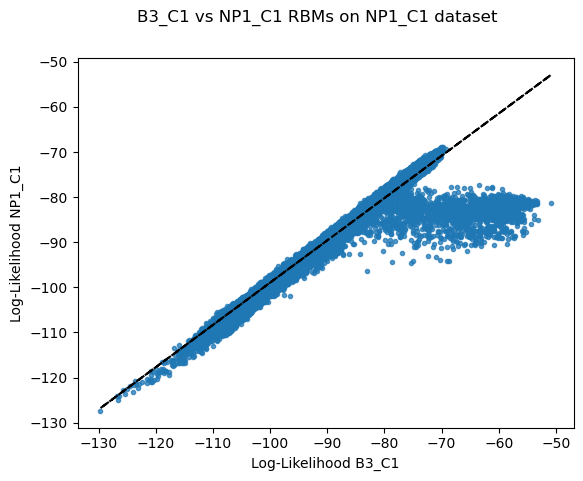

In [17]:
lr_label = rounds[-1].upper()
fr_label = rounds[0].upper()
am.compare_likelihood_correlation(last_round_likelihoods["likelihoods"][rounds[-1]], first_round_likelihoods["likelihoods"][rounds[-1]], f"{lr_label} vs {fr_label} RBMs on {fr_label} dataset", [lr_label, fr_label])